In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### 1. Problement Statement 

                              Desicion Tree apply on Class Features to predict the class

### 2.Data Gathering 

In [3]:
df=pd.read_csv('Star_classifications.csv')
df

obj_ID       alpha      delta         u         g         r  \
0      1.240000e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.240000e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.240000e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.240000e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.240000e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.240000e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.240000e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.240000e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.240000e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.240000e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.540000e+18   
1      21.16812  21.61427    4518       301        5       119  1.180000e+19   
2      19.34857  18.94827    3606       301        2       120  5.150000e+18   
3      20.50454  19.25010    4192       301        3       214  1.030000e+19   
4      15.97711  15.54461    8102       301        3       137  6.890000e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.060000e+19   
99996  19.75759  19.41526    7917       301        1       289  8.590000e+18   
99997  17.69034  17.35221    5314       301        4       308  3.110000e+18   
99998  19.07254  18.62482    3650       301        4       131  7.600000e+18   
99999  20.00959  19.28075    3650       301        4        60  8.340000e+18   

       class  redshift  plate    MJD  fiber_ID  
0          0  0.634794   5812  56354       171  
1          0  0.779136  10445  58158       427  
2          0  0.644195   4576  55592       299  
3          0  0.932346   9149  58039       775  
4          0  0.116123   6121  56187       842  
...      ...       ...    ...    ...       ...  
99995      0  0.000000   9374  57749       438  
99996      0  0.404895   7626  56934       866  
99997      0  0.143366   2764  54535        74  
99998      0  0.455040   6751  56368       470  
99999      0  0.542944   7410  57104       851  

[100000 rows x 18 columns]

In [4]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


<function matplotlib.pyplot.show(close=None, block=None)>

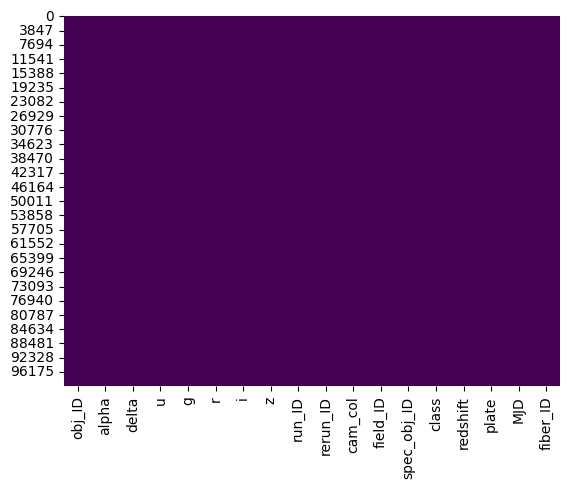

In [6]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show

In [6]:
df=df.fillna(0)  #for Nan values if any adding heres
df

obj_ID       alpha      delta         u         g         r  \
0      1.240000e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.240000e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.240000e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.240000e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.240000e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.240000e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.240000e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.240000e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.240000e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.240000e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.540000e+18   
1      21.16812  21.61427    4518       301        5       119  1.180000e+19   
2      19.34857  18.94827    3606       301        2       120  5.150000e+18   
3      20.50454  19.25010    4192       301        3       214  1.030000e+19   
4      15.97711  15.54461    8102       301        3       137  6.890000e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.060000e+19   
99996  19.75759  19.41526    7917       301        1       289  8.590000e+18   
99997  17.69034  17.35221    5314       301        4       308  3.110000e+18   
99998  19.07254  18.62482    3650       301        4       131  7.600000e+18   
99999  20.00959  19.28075    3650       301        4        60  8.340000e+18   

       class  redshift  plate    MJD  fiber_ID  
0          0  0.634794   5812  56354       171  
1          0  0.779136  10445  58158       427  
2          0  0.644195   4576  55592       299  
3          0  0.932346   9149  58039       775  
4          0  0.116123   6121  56187       842  
...      ...       ...    ...    ...       ...  
99995      0  0.000000   9374  57749       438  
99996      0  0.404895   7626  56934       866  
99997      0  0.143366   2764  54535        74  
99998      0  0.455040   6751  56368       470  
99999      0  0.542944   7410  57104       851  

[100000 rows x 18 columns]

### 3. Eda 

In [7]:
df.shape

(100000, 18)

In [8]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


In [11]:
df[['delta','u']].boxplot()

<Axes: >

<Axes: >

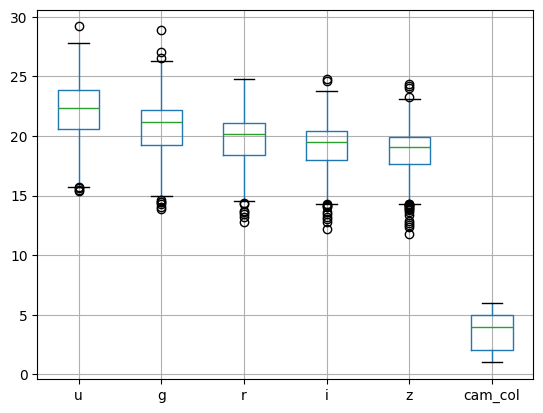

In [154]:
df[['u','g','r','i','z','cam_col',]].boxplot()

<Axes: >

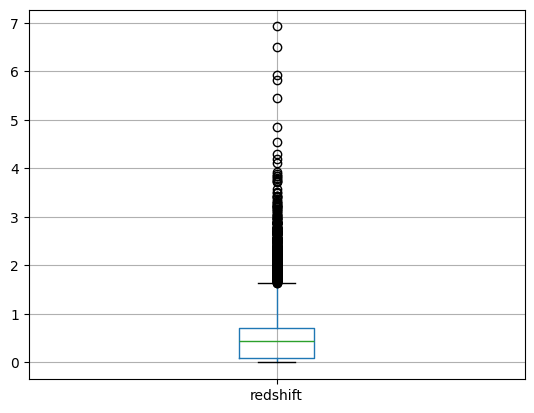

In [155]:
df[['redshift']].boxplot()

<Axes: >

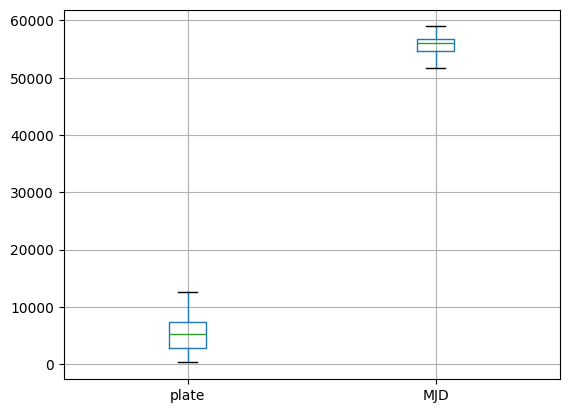

In [156]:
df[['plate','MJD']].boxplot()

In Desion Tree not sensitive to outlier so doesnt apply any techiniques like mean , median transformation techniques.

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       3500 non-null   float64
 1   alpha        3500 non-null   float64
 2   delta        3500 non-null   float64
 3   u            3500 non-null   float64
 4   g            3500 non-null   float64
 5   r            3500 non-null   float64
 6   i            3500 non-null   float64
 7   z            3500 non-null   float64
 8   run_ID       3500 non-null   int64  
 9   rerun_ID     3500 non-null   int64  
 10  cam_col      3500 non-null   int64  
 11  field_ID     3500 non-null   int64  
 12  spec_obj_ID  3500 non-null   float64
 13  class        3500 non-null   int64  
 14  redshift     3500 non-null   float64
 15  plate        3500 non-null   int64  
 16  MJD          3500 non-null   int64  
 17  fiber_ID     3500 non-null   int64  
dtypes: float64(10), int64(8)
memory usage: 492.3 KB


<function matplotlib.pyplot.show(close=None, block=None)>

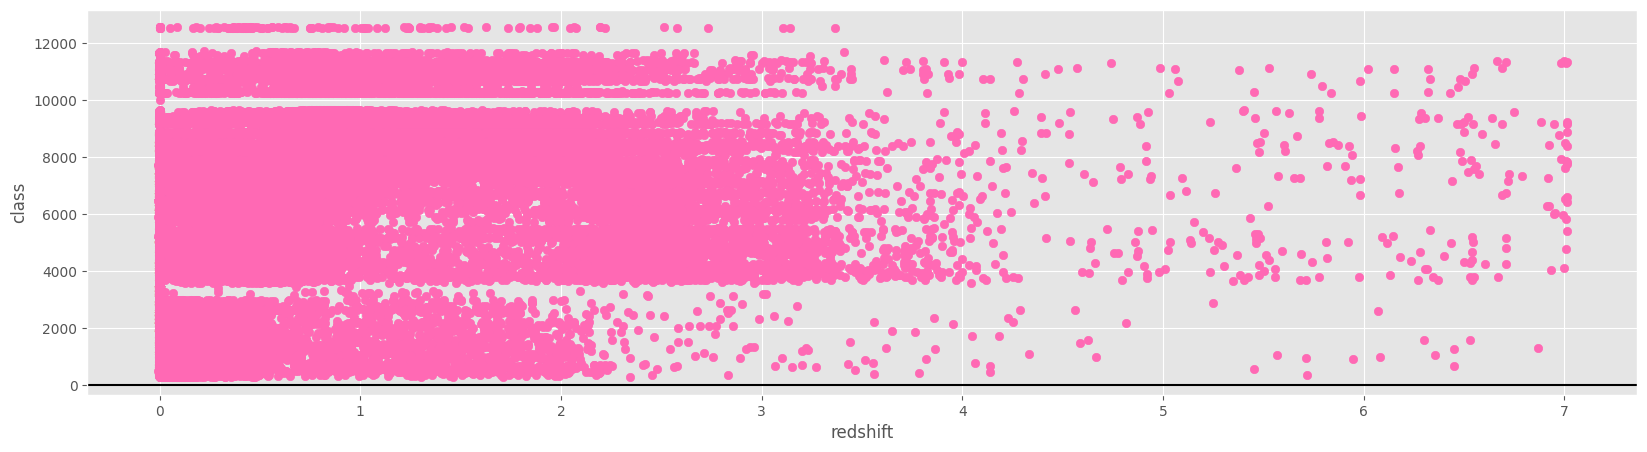

In [28]:
plt.style.use('ggplot')
fig, axes=plt.subplots(1,1, figsize=(20,5))
plt.scatter(df.redshift, df.plate ,color='hotpink')
plt.axhline(y=10, color='Black')
plt.xlabel('redshift')
plt.ylabel('class')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

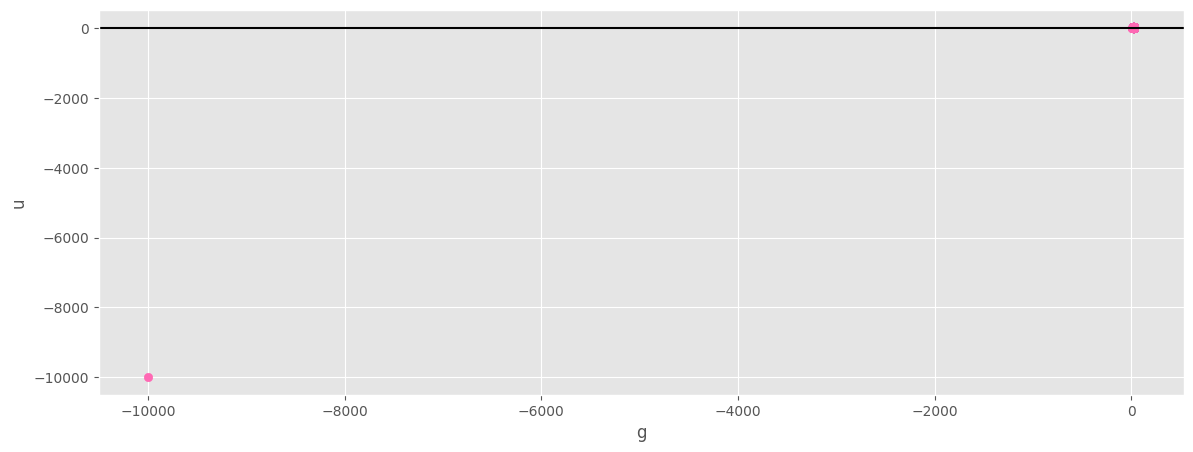

In [42]:
plt.style.use('ggplot')
fig, axes=plt.subplots(1,1, figsize=(14,5))
plt.scatter(df.g, df.u,color='hotpink')
plt.axhline(y=10, color='Black')
plt.xlabel('g')
plt.ylabel('u')
plt.show

In [44]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.240000e+18     177.629117      24.135305      21.980468   
std    0.000000e+00      96.502241      19.644665      31.769291   
min    1.240000e+18       0.005528     -18.785328   -9999.000000   
25%    1.240000e+18     127.518222       5.146771      20.352353   
50%    1.240000e+18     180.900700      23.645922      22.179135   
75%    1.240000e+18     233.895005      39.901550      23.687440   
max    1.240000e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783925e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324007e+18   
min       109.000000     301.0       1.000000      11.000000  3.000000e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.840000e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.610000e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.330000e+18   
max      8162.000000     301.0       6.000000     989.000000  1.410000e+19   

               class       redshift          plate            MJD  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.621490       0.576661    5137.009660   55588.647500   
std         0.816778       0.730707    2952.303351    1808.484233   
min         0.000000      -0.009971     266.000000   51608.000000   
25%         0.000000       0.054517    2526.000000   54234.000000   
50%         0.000000       0.424173    4987.000000   55868.500000   
75%         1.000000       0.704154    7400.250000   56777.000000   
max         2.000000       7.011245   12547.000000   58932.000000   

            fiber_ID  
count  100000.000000  
mean      449.312740  
std       272.498404  
min         1.000000  
25%       221.000000  
50%       433.000000  
75%       645.000000  
max      1000.000000

In [45]:
df.corr()

obj_ID     alpha     delta         u         g         r  \
obj_ID          NaN       NaN       NaN       NaN       NaN       NaN   
alpha           NaN  1.000000  0.138691 -0.001532 -0.002423 -0.022083   
delta           NaN  0.138691  1.000000  0.002074  0.003523 -0.006835   
u               NaN -0.001532  0.002074  1.000000  0.999311  0.054149   
g               NaN -0.002423  0.003523  0.999311  1.000000  0.062387   
r               NaN -0.022083 -0.006835  0.054149  0.062387  1.000000   
i               NaN -0.023580 -0.004480  0.045730  0.056271  0.962868   
z               NaN -0.002918  0.003630  0.998093  0.999161  0.053677   
run_ID          NaN -0.013737 -0.301238  0.015309  0.015710  0.153889   
rerun_ID        NaN       NaN       NaN       NaN       NaN       NaN   
cam_col         NaN  0.019582  0.032565  0.003548  0.003508  0.008480   
field_ID        NaN -0.165577 -0.173416 -0.008374 -0.008852 -0.026423   
spec_obj_ID     NaN -0.002535  0.112290  0.030001  0.039448  0.655300   
class           NaN -0.011756  0.014452 -0.024645 -0.020066 -0.076766   
redshift        NaN  0.001667  0.031638  0.014309  0.022954  0.433241   
plate           NaN -0.002554  0.112329  0.029997  0.039443  0.655243   
MJD             NaN  0.019943  0.107333  0.031997  0.040274  0.671180   
fiber_ID        NaN  0.030464  0.028250  0.016305  0.017470  0.223106   

                    i         z    run_ID  rerun_ID   cam_col  field_ID  \
obj_ID            NaN       NaN       NaN       NaN       NaN       NaN   
alpha       -0.023580 -0.002918 -0.013737       NaN  0.019582 -0.165577   
delta       -0.004480  0.003630 -0.301238       NaN  0.032565 -0.173416   
u            0.045730  0.998093  0.015309       NaN  0.003548 -0.008374   
g            0.056271  0.999161  0.015710       NaN  0.003508 -0.008852   
r            0.962868  0.053677  0.153889       NaN  0.008480 -0.026423   
i            1.000000  0.055994  0.147668       NaN  0.007615 -0.026679   
z            0.055994  1.000000  0.013811       NaN  0.003365 -0.008903   
run_ID       0.147668  0.013811  1.000000       NaN -0.047098  0.031498   
rerun_ID          NaN       NaN       NaN       NaN       NaN       NaN   
cam_col      0.007615  0.003365 -0.047098       NaN  1.000000 -0.015684   
field_ID    -0.026679 -0.008903  0.031498       NaN -0.015684  1.000000   
spec_obj_ID  0.661689  0.037817  0.239414       NaN -0.001998 -0.083390   
class        0.015028 -0.001614 -0.036014       NaN  0.023138 -0.034833   
redshift     0.492383  0.030380  0.065400       NaN  0.000097 -0.021331   
plate        0.661640  0.037813  0.239459       NaN -0.001949 -0.083471   
MJD          0.672523  0.037469  0.262687       NaN -0.006745 -0.095064   
fiber_ID     0.214787  0.014668  0.067165       NaN  0.121597 -0.012337   

             spec_obj_ID     class  redshift     plate       MJD  fiber_ID  
obj_ID               NaN       NaN       NaN       NaN       NaN       NaN  
alpha          -0.002535 -0.011756  0.001667 -0.002554  0.019943  0.030464  
delta           0.112290  0.014452  0.031638  0.112329  0.107333  0.028250  
u               0.030001 -0.024645  0.014309  0.029997  0.031997  0.016305  
g               0.039448 -0.020066  0.022954  0.039443  0.040274  0.017470  
r               0.655300 -0.076766  0.433241  0.655243  0.671180  0.223106  
i               0.661689  0.015028  0.492383  0.661640  0.672523  0.214787  
z               0.037817 -0.001614  0.030380  0.037813  0.037469  0.014668  
run_ID          0.239414 -0.036014  0.065400  0.239459  0.262687  0.067165  
rerun_ID             NaN       NaN       NaN       NaN       NaN       NaN  
cam_col        -0.001998  0.023138  0.000097 -0.001949 -0.006745  0.121597  
field_ID       -0.083390 -0.034833 -0.021331 -0.083471 -0.095064 -0.012337  
spec_obj_ID     1.000000 -0.010152  0.388628  0.999996  0.970157  0.241246  
class          -0.010152  1.000000 -0.054239 -0.010060 -0.000405 -0.041586  
redshift        0.388628 -0.054239  1.000000

In [ ]:
df.plot(kind='pie',y='col')

In [ ]:
df.plot(kind='area')

In [158]:
x=df.drop('class', axis=1)
y=df['class']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=20, stratify=y)

### feature Selection

alpha       0.069995
delta       0.145384
u           0.105340
g           0.103282
r           0.056270
i           0.102470
z           0.148129
redshift    0.766694
plate       0.333485
MJD         0.238177
dtype: float64


<Axes: >

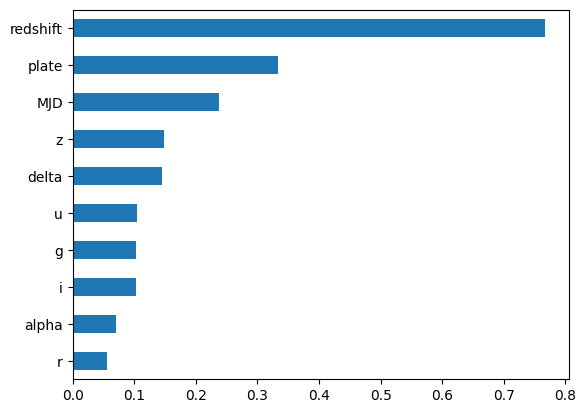

In [166]:
from sklearn.feature_selection import mutual_info_classif
array=mutual_info_classif(x,y)
s2=pd.Series(array, index=x.columns)
print(s2)
s2.sort_values().plot(kind='barh')

In [ ]:
df=df.drop('obj_ID' ,axis=1)
df=df.drop('rerun_ID' ,axis=1)
df=df.drop('field_ID' ,axis=1)
df=df.drop('spec_obj_ID',axis=1)
df=df.drop('cam_col', axis=1)
df=df.drop('fiber_ID' ,axis=1)
df=df.drop('run_ID' ,axis=1)

In [167]:
df

alpha      delta         u         g         r         i         z  \
0     135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1     144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2     142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3     338.741038   0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4     345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   
...          ...        ...       ...       ...       ...       ...       ...   
3495  345.006568  19.111131  22.70445  20.47006  18.84402  18.21586  17.80935   
3496  350.371746  19.759403  25.68374  21.73884  20.09777  19.53035  19.32258   
3497  328.591377  26.015920  23.83932  21.54532  20.08967  19.11551  18.72437   
3498    8.366033  31.002881  23.73583  20.75340  19.07258  18.44580  18.07090   
3499  215.873669  56.388546  20.41390  18.33488  17.12825  16.66977  16.29756   

      class  redshift  plate    MJD  
0         0     0.635   5812  56354  
1         0     0.779  10445  58158  
2         0     0.644   4576  55592  
3         0     0.932   9149  58039  
4         0     0.116   6121  56187  
...     ...       ...    ...    ...  
3495      0     0.308   6128  56236  
3496      0     0.296   6124  56211  
3497      0     0.581   5959  56214  
3498      0     0.314   6526  56543  
3499      0     0.175   1161  52703  

[3500 rows x 11 columns]

In [169]:
x=df.drop('class', axis=1)
y=df['class']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=20, stratify=y)

In [170]:
dt_clf=DecisionTreeClassifier(random_state=12,)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

### Plot Decision Tree

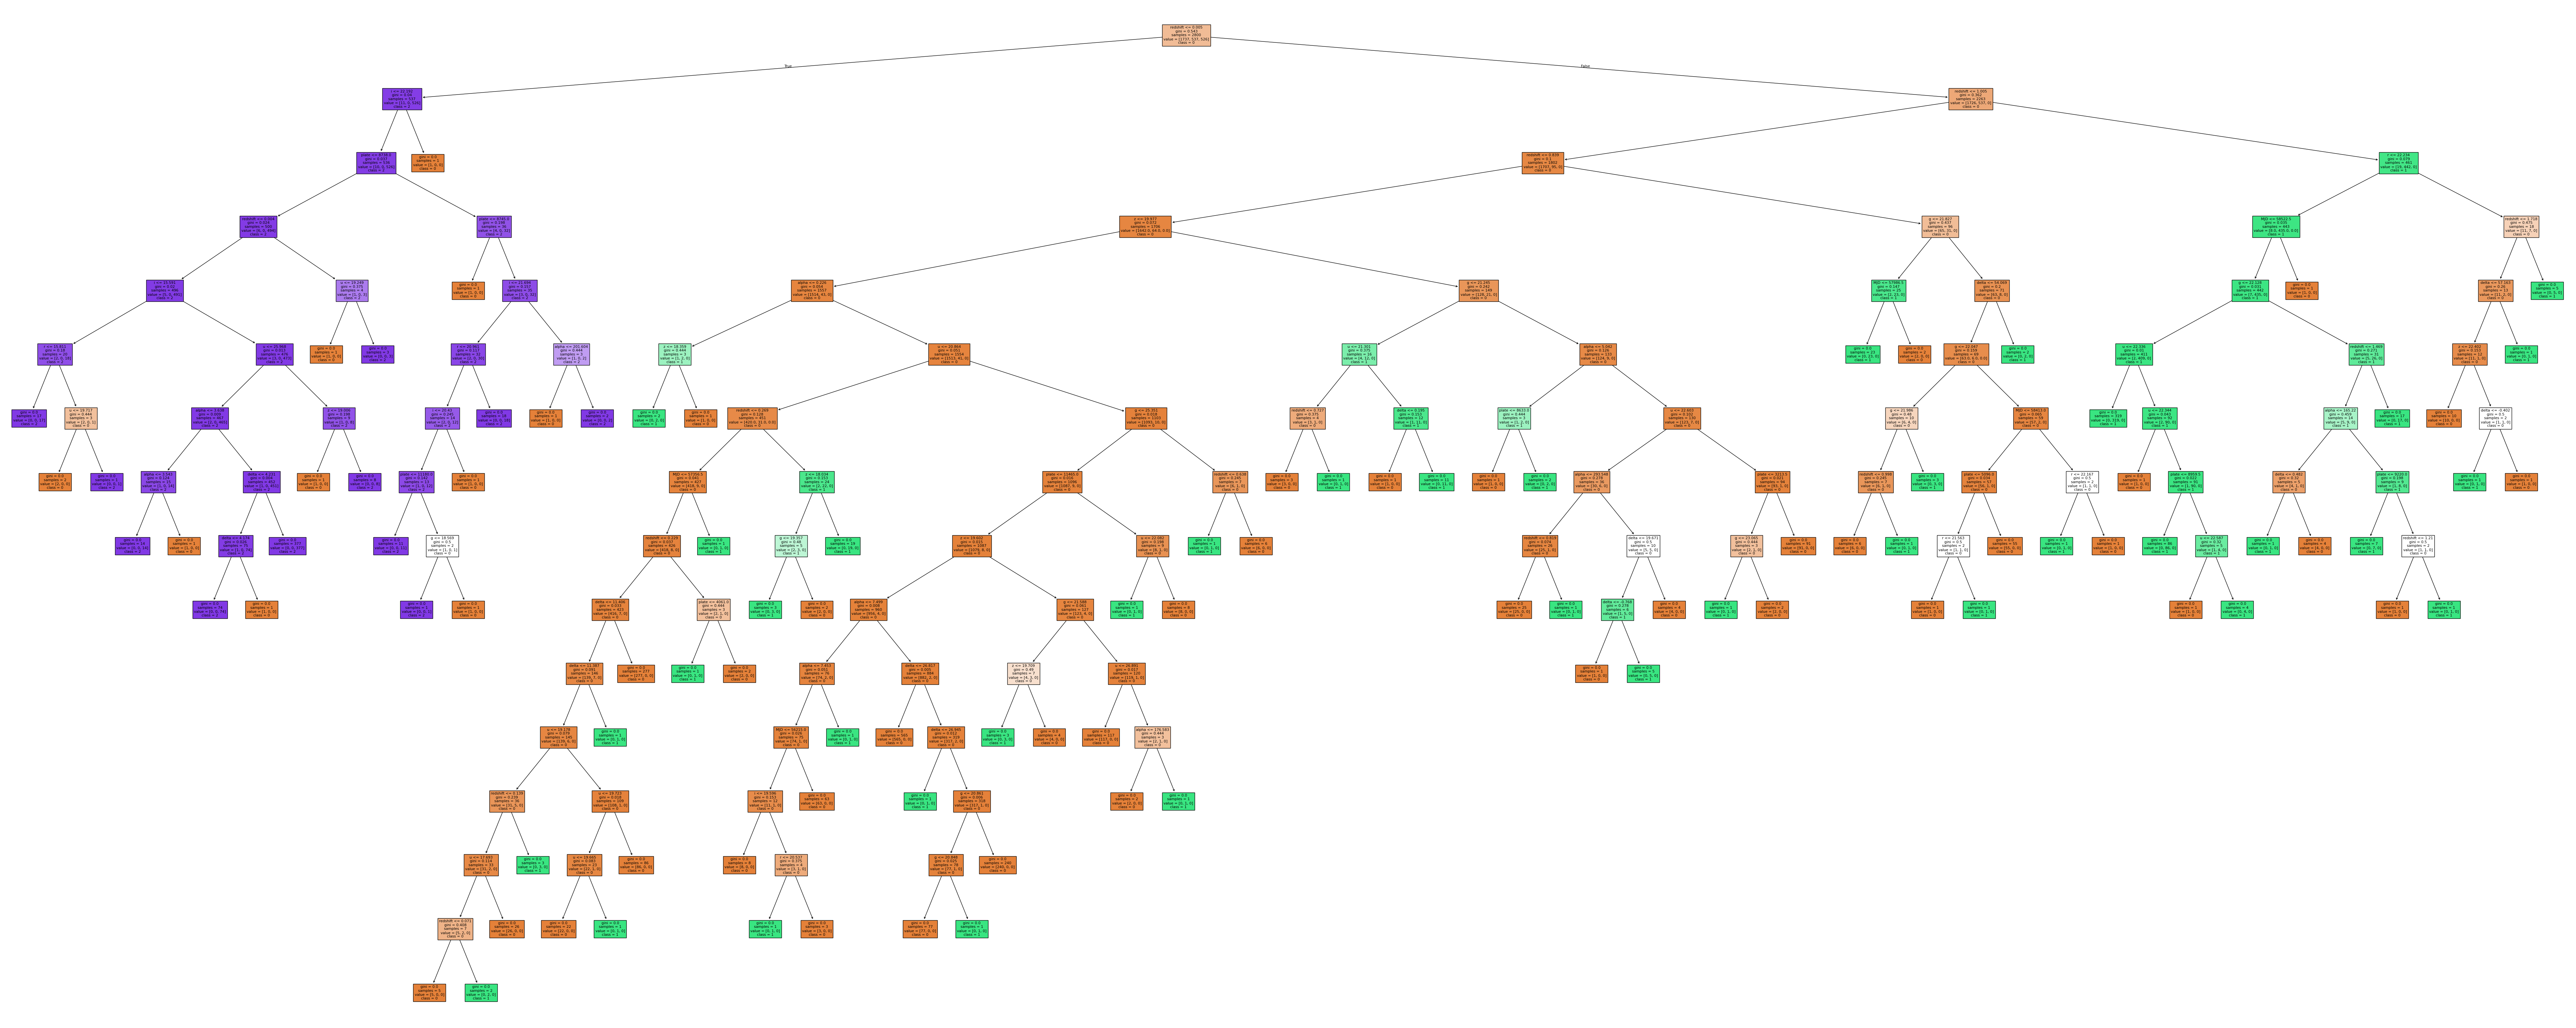

In [171]:
plt.figure(figsize=(100, 40))
tree= plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1','2'], filled=True)
# plt.savefig('DT_of_Star_classifications')

### Evaluation

In [172]:
#Training Data Evaluation

y_pred_train=dt_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix:\n',cnf_matrix)

print('#'*20)

accuracy=accuracy_score(y_train, y_pred_train)
print('Accuracy:',accuracy)
print('#'*20)

clf_report=classification_report(y_train, y_pred_train)
print('Classification Report:\n', clf_report)

Confusion Matrix:
 [[1737    0    0]
 [   0  537    0]
 [   0    0  526]]
####################
Accuracy: 1.0
####################
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1737
           1       1.00      1.00      1.00       537
           2       1.00      1.00      1.00       526

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



In [173]:
#Testing Data Evaluation

y_pred_test =dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

print('*'*40)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)
print('*'*40)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[417  11   6]
 [ 13 121   0]
 [  0   0 132]]
****************************************
Accuracy : 0.9571428571428572
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       434
           1       0.92      0.90      0.91       134
           2       0.96      1.00      0.98       132

    accuracy                           0.96       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.96      0.96      0.96       700



### Feature Selection

<Axes: >

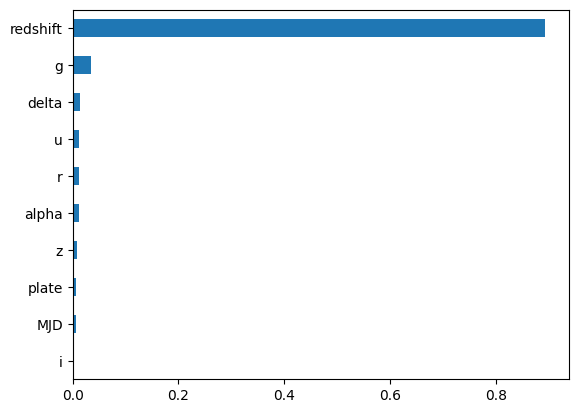

In [174]:
s1=pd.Series(dt_clf.feature_importances_, index=x.columns)
s1.sort_values().plot(kind='barh')

### Hyperparameter Tuning

In [175]:
dt_clf=DecisionTreeClassifier(random_state=12)


### 1.GridSearchCV

In [202]:
param_grid={"criterion": ['gini', 'entropy'],
"max_depth": np.arange(2, 10),
"min_samples_split": np.arange(5, 10),
"min_samples_leaf" : np.arange(2, 10)}

gscv_dt_model=GridSearchCV(dt_clf, param_grid, n_jobs=-1, cv=5,verbose=1 )
gscv_dt_model.fit(x_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=np.int64(7),
                                              min_samples_leaf=np.int64(6),
                                              min_samples_split=np.int64(5),
                                              random_state=12),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])},
             verbose=1)

In [203]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(7),
                       min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(5), random_state=12)

In [204]:
dt_clf=DecisionTreeClassifier( max_depth=7,
                       min_samples_leaf=6,
                       min_samples_split=5, random_state=12)
dt_clf=gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(7),
                       min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(5), random_state=12)

In [205]:
#Training Data Evaluation

y_pred_train=dt_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix:\n',cnf_matrix)

print('#'*20)

accuracy=accuracy_score(y_train, y_pred_train)
print('Accuracy:',accuracy)
print('#'*20)

clf_report=classification_report(y_train, y_pred_train)
print('Classification Report:\n', clf_report)

Confusion Matrix:
 [[1724    5    8]
 [  46  491    0]
 [   3    0  523]]
####################
Accuracy: 0.9778571428571429
####################
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1737
           1       0.99      0.91      0.95       537
           2       0.98      0.99      0.99       526

    accuracy                           0.98      2800
   macro avg       0.98      0.97      0.97      2800
weighted avg       0.98      0.98      0.98      2800



In [206]:
#Testing Data Evaluation

y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

print('*'*40)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)
print('*'*40)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[420   7   7]
 [ 15 119   0]
 [  0   0 132]]
****************************************
Accuracy : 0.9585714285714285
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       434
           1       0.94      0.89      0.92       134
           2       0.95      1.00      0.97       132

    accuracy                           0.96       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.96      0.96      0.96       700



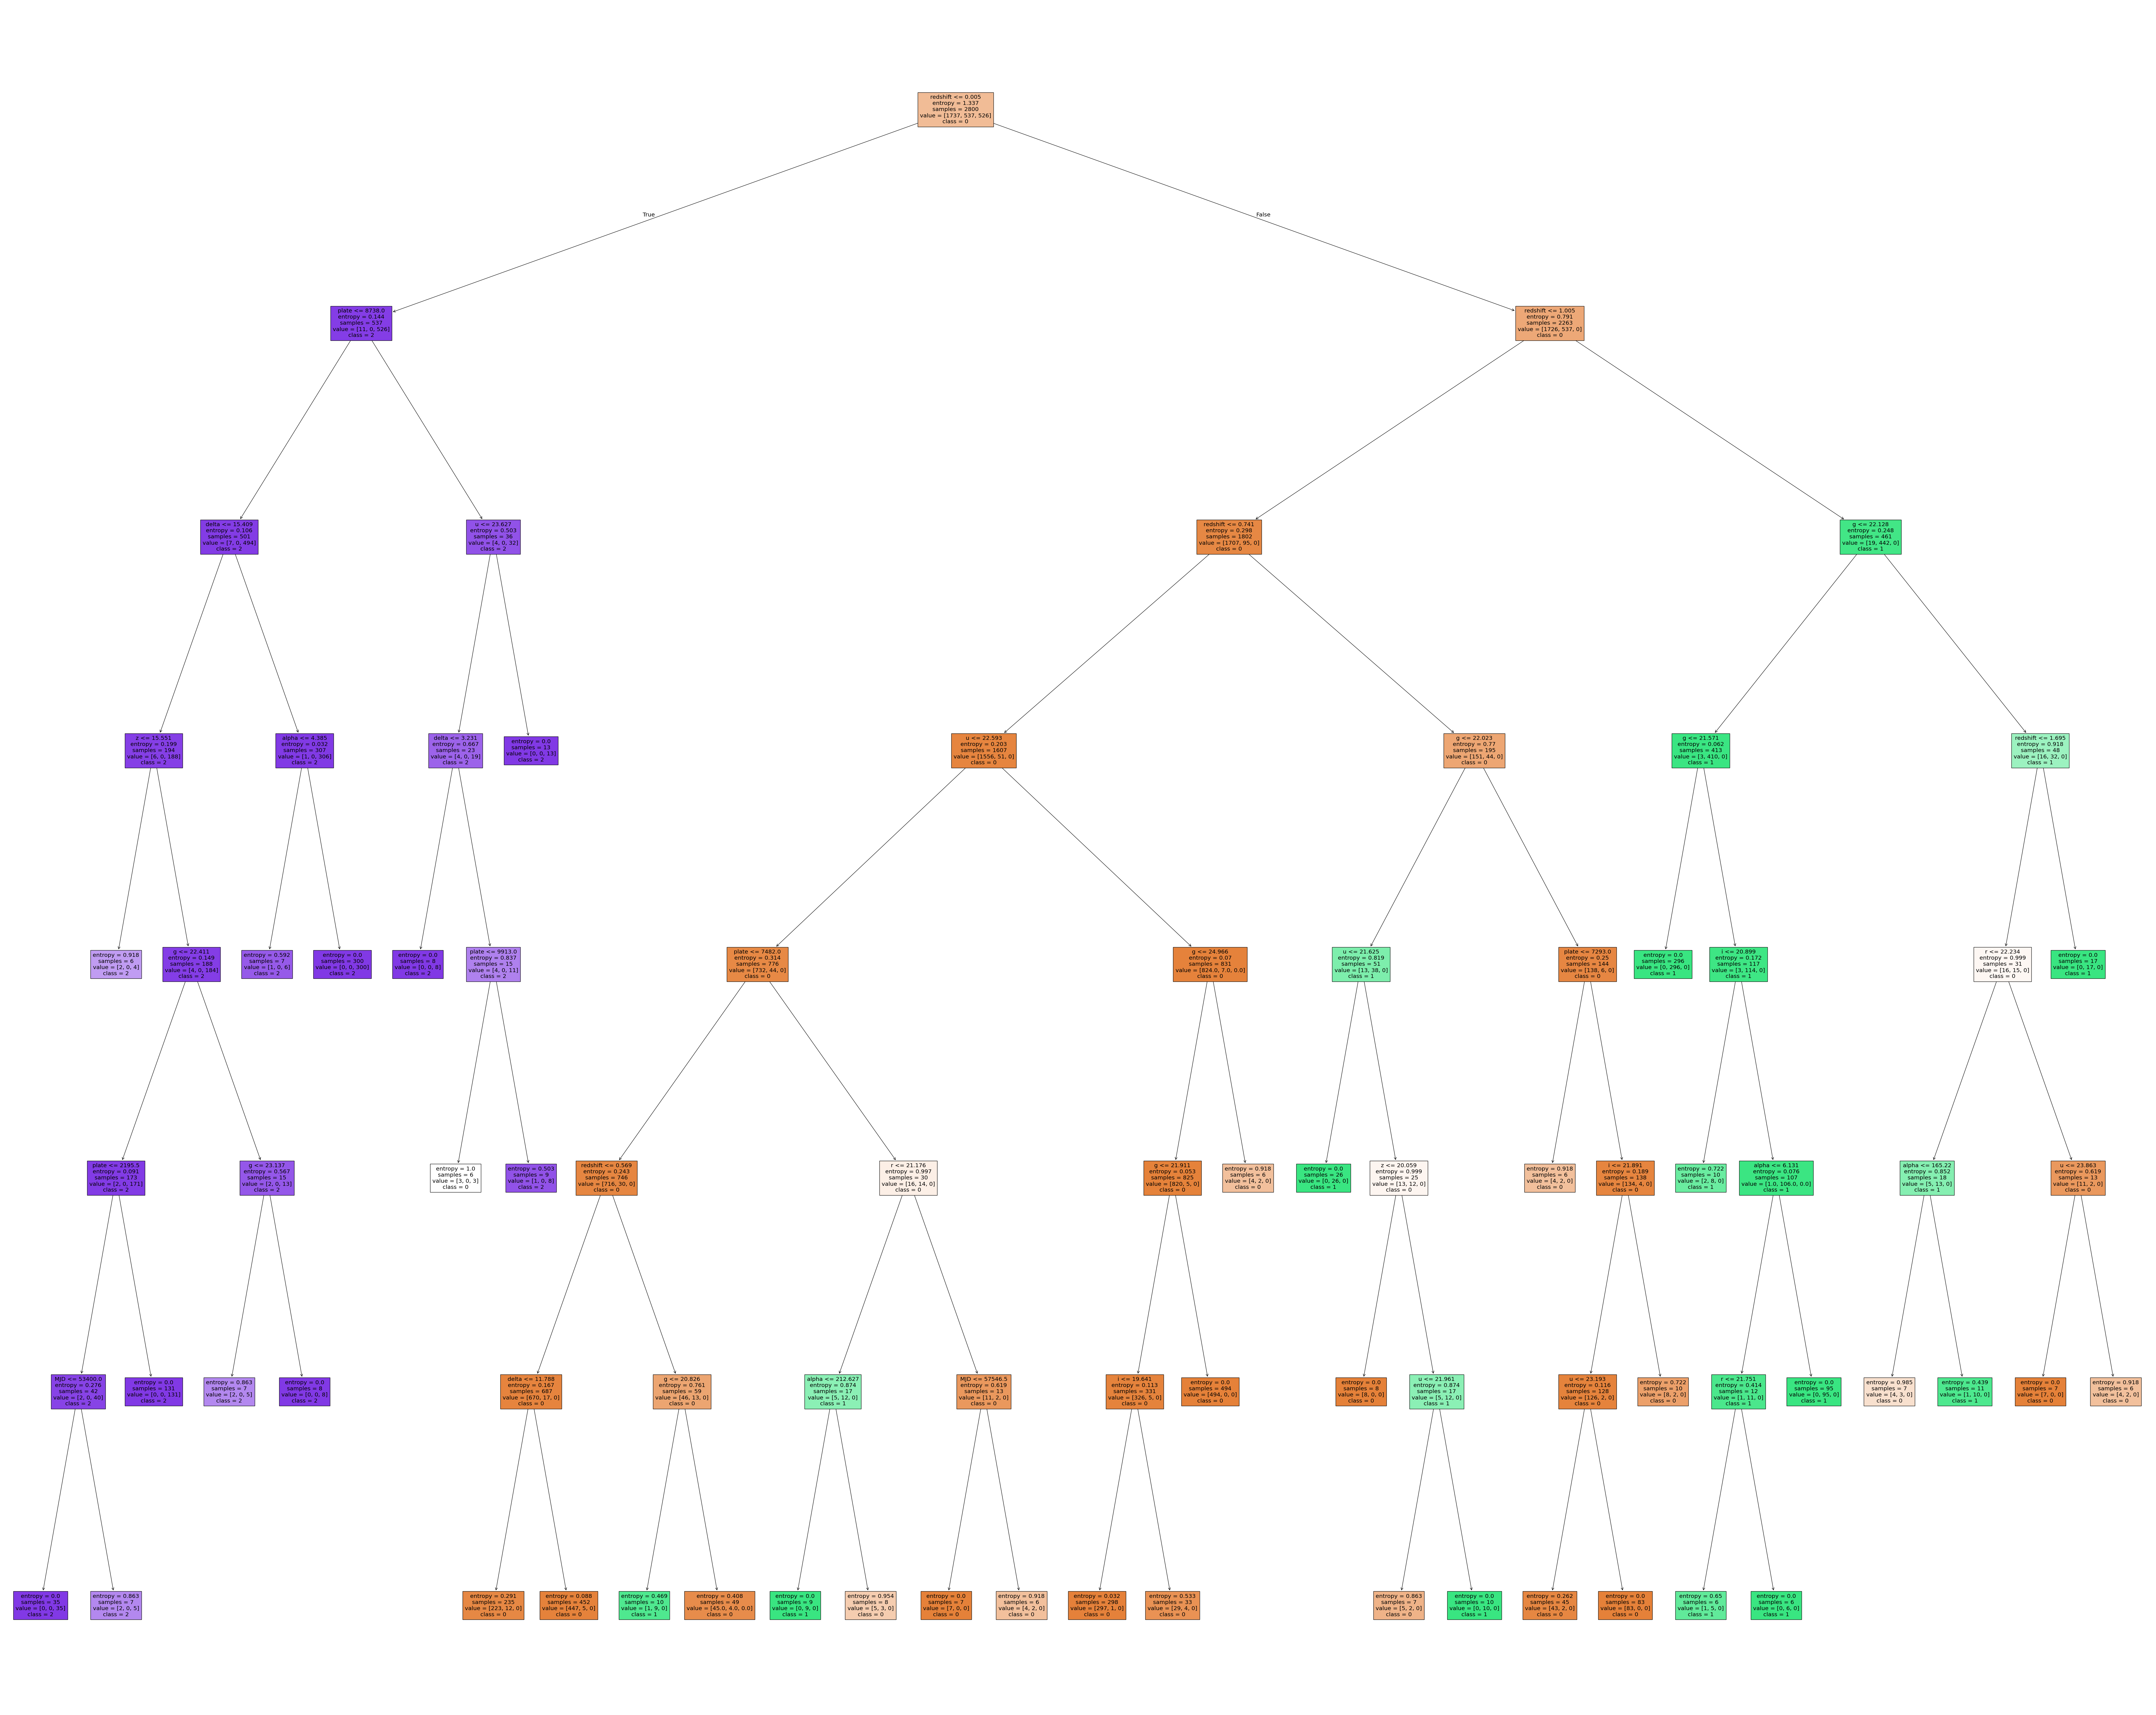

In [182]:
plt.figure(figsize=(100, 80))
tree= plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1','2'], filled=True)
# plt.savefig('DT_of_Star_classifications')

### 2. RandomSearhCV

In [208]:
dt_clf=DecisionTreeClassifier(random_state=12)

In [209]:

                               
param_={"criterion": ['gini'],
"max_depth": np.arange(2, 10),
"min_samples_split": np.arange(5, 10),
"min_samples_leaf" : np.arange(2, 10)}

rndmsearch_dt_model=GridSearchCV(dt_clf, param_, n_jobs=-1, cv=5,verbose=1 )
rndmsearch_dt_model.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])},
             verbose=1)

In [212]:
rndmsearch_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(8), min_samples_leaf=np.int64(7),
                       min_samples_split=np.int64(5), random_state=12)

In [217]:
dt_clf=DecisionTreeClassifier={"criterion": ['gini'],"max_depth": np.arange(2, 10),
"min_samples_split": np.arange(5, 10),
"min_samples_leaf" : np.arange(2, 10)}

dt_clf=gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(7),
                       min_samples_leaf=np.int64(6),
                       min_samples_split=np.int64(5), random_state=12)

In [218]:
#Training Data Evaluation

y_pred_train=dt_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix:\n',cnf_matrix)

print('#'*20)

accuracy=accuracy_score(y_train, y_pred_train)
print('Accuracy:',accuracy)
print('#'*20)

clf_report=classification_report(y_train, y_pred_train)
print('Classification Report:\n', clf_report)

Confusion Matrix:
 [[1724    5    8]
 [  46  491    0]
 [   3    0  523]]
####################
Accuracy: 0.9778571428571429
####################
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1737
           1       0.99      0.91      0.95       537
           2       0.98      0.99      0.99       526

    accuracy                           0.98      2800
   macro avg       0.98      0.97      0.97      2800
weighted avg       0.98      0.98      0.98      2800



In [219]:
#Testing Data Evaluation

y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

print('*'*40)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)
print('*'*40)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[420   7   7]
 [ 15 119   0]
 [  0   0 132]]
****************************************
Accuracy : 0.9585714285714285
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       434
           1       0.94      0.89      0.92       134
           2       0.95      1.00      0.97       132

    accuracy                           0.96       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.96      0.96      0.96       700

